In [96]:
import pandas as pd
import random
import numpy as np
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
import gym_gridworlds
#env = gym.make('Gridworld-v0')
  
from collections import defaultdict
import plottingepi
import matplotlib.pyplot as plt
#import plotting

In [66]:
word_df=pd.read_csv('5-letter.csv', index_col=0)
print(word_df.head())
word_list = word_df.word.iloc[0:5000,].to_list() # keep top 50000 words
word_list = word_df.word.to_list() # keep top 50000 words

#print(word_list)

word_list.append('WHOMP')
print(len(word_list))

     word       count
25  WHICH  3140226612
33  THEIR  2152980325
40  THERE  1623700147
46  WOULD  1472811049
51  OTHER  1383185827
10542


In [241]:
np.where(word_df.word=="SHEAR")

(array([902], dtype=int64),)

In [366]:
class Wordle:
    def __init__(self, word=None, n_guesses=6, n_letters=5, all_words=['PROOF','SHEAR','BUMPY']):
        if word == None:
            self.word = random.sample(set(all_words), 1)[0]
        else:
            self.word = word.upper()
        self.n_guesses = n_guesses
        self.n_letters = n_letters
        self.guess_counter = n_guesses
        self.greens = [None] * self.n_letters 
        self.current_yellows = [None] * self.n_letters
        self.yellows = {i: [] for i in range(self.n_letters)}
        self.guessed_words = []
        self.all_words = all_words
        self.absent_letters = []
        self.present_letters = []
        self.correct_positions = [None] * self.n_letters # greens would be differnt per guess, remember correct positions
        self.state = None
        self.qstate = [0] * self.n_letters
        self.tmp_qstate = [0] * self.n_letters
        self.win = ''
        self.yellowlist = []
        
    def try_word (self, guess):
        # need to add a check for not doing anything if the word is already guessed correctly
        guess = guess.upper()
        self.state = None
        self.current_yellows = [None]* self.n_letters # yellows have to reset each time
        self.greens = [None] * self.n_letters
        self.tmp_qstate = [0] * self.n_letters
        
        print('guessed: ', guess)
        if not len(guess) == self.n_letters:
            raise ValueError('wrong word length')
        if guess not in self.all_words:
            raise ValueError('invalid word')
        if guess in self.guessed_words:
            raise ValueError('word already guessed')
        self.guessed_words.append(guess)
        # c_g = character_guess,  c_w = character_word
        for i, (c_g, c_w) in enumerate(zip(guess, self.word)):
            if c_g == c_w:
                self.greens[i] = c_g
                self.correct_positions[i] = c_g
                self.qstate[i] = 1
                self.tmp_qstate[i] = 1
            # Check for number of non-None in greens list 
            if sum(bool(char) for char in self.greens) == self.n_letters:
                self.state = True
                self.win ='win'
                print('victory! word is: ' + self.word) 
                grn_sum = sum([x!=None for x in self.greens])
                yel_sum = sum([x!=None for x in self.current_yellows])
                return grn_sum, yel_sum
            if c_g in self.word and c_g != c_w:
                self.yellows[i].append(c_g)
                self.current_yellows[i] = c_g
                if c_g not in self.yellowlist:
                    self.yellowlist += c_g
            if c_g in self.word: # track the letters that are there for the AI later
                self.present_letters.append(c_g)
            if c_g not in self.word: # track letters that are not there for the AI
                self.absent_letters.append(c_g)
        self.guess_counter -= 1
        grn_sum = sum([x!=None for x in self.greens])
        yel_sum = sum([x!=None for x in self.current_yellows])
        
        if self.guess_counter == 0:
            self.state=True
            self.win = 'lose'
            print("YOU LOSE-TOO MANY GUESSES")
            return grn_sum, yel_sum # return number of greens and number of yellows
        print('Greens:' + str(self.greens) + 
              '\nYellows: ' + str(self.yellows) + 
              '\nGuesses left: ' + str(self.guess_counter))

        return grn_sum, yel_sum # return number of greens and number of yellows
        

In [367]:
print(len(word_list))

10542


In [372]:
w = Wordle(all_words = word_list)

In [373]:
w.word

'PATCH'

In [381]:
w.try_word("CLEAN")

guessed:  CLEAN
Greens:[None, None, None, None, None]
Yellows: {0: ['C', 'C'], 1: ['H'], 2: [], 3: ['A'], 4: ['T']}
Guesses left: 3


(0, 2)

In [446]:
w.yellows

{0: ['C', 'C'], 1: ['H'], 2: [], 3: ['A'], 4: ['T']}

In [447]:
w.yellowlist

['T', 'C', 'H', 'A']

In [448]:
w.greens

[None, None, None, None, None]

In [439]:
GREENS = ['C', None, None, None, 'H']
all_words = word_list
match_list=[]
for i, letter in enumerate(GREENS):
    match_list+=[word for word in all_words if word[i]==letter]
    if letter is not None:
        print(i)
        all_words = list(match_list)
        match_list = []

0
4


In [440]:
print(match_list[0:5])
print(match_list[-5:])
print(len(match_list))

[]
[]
0


In [441]:
import string

In [442]:
ABSENT = ['O']

In [443]:
print(len(all_words))
all_words

14


['CLOTH',
 'CATCH',
 'COACH',
 'CRASH',
 'COUCH',
 'COUGH',
 'CZECH',
 'CLASH',
 'CRUSH',
 'CONCH',
 'CINCH',
 'CHIEH',
 'CUTCH',
 'COOCH']

In [482]:
YELLOWS = {i: [] for i in range(5)}
YELLOWS[1].append('A')
YELLOWS[1].append('Z')

YELLOWS

{0: [], 1: ['A', 'Z'], 2: [], 3: [], 4: []}

In [483]:
aw[0][4]

'H'

In [484]:
aw = list(all_words)
print(len(aw))
for key in YELLOWS.keys():
    #print(key)
    #print([w[key] for w in aw])
    for w in aw:
        #print(w)
        #print(YELLOWS[key])
        if w[key] in YELLOWS[key]:
            aw.remove(w)
print(len(aw))
            

14
12


In [445]:
set(ABSENT).issuperset

<function set.issuperset>

In [252]:
[*filter(set(ABSENT).issuperset, all_words)] 

[]

In [485]:
# player agent class
# try unknown letters

# need to add the ability to take the correct letters as input to the guess methods


## this is where we can have different 'types' of word guesses to be optimized
class Player:
    def __init__(self, all_words):
        self.guesses=0
        self.guessed_words = []
        self.all_words = all_words
        self.tmp_wordlist = []
        
    def get_random_guess(self):
        '''
        make a guess randomly from the word list
        '''       
        current_guess = random.sample(set(self.all_words), 1)[0]
        while(current_guess in self.guessed_words):
            current_guess = random.sample(set(self.all_words), 1)[0]
        self.guessed_words.append(current_guess)
        return current_guess
    #def get_common_guess(self):
    #    i=0
    #    while( self.all_words[i] in self.guessed_words):
    #        i+=1
    #    self.guessed_words.append(self.all_words[i])
    #    return self.all_words[i]
    
    def guess_by_green(self, GREENS):
        match_list=[]
        ALL_WORDS = self.all_words
        if not all(v is None for v in GREENS):
            for i, letter in enumerate(GREENS):
                match_list+=[word for word in ALL_WORDS if word[i]==letter]
                if letter is not None:
                    print(i)
                    ALL_WORDS = list(match_list)
                    match_list = []
            current_guess = random.sample(set(ALL_WORDS), 1)[0]
            # saw this fail on COUCH when it guessed COUGH
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(ALL_WORDS), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = ALL_WORDS
        else:
            current_guess = random.sample(set(self.all_words), 1)[0]
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(self.all_words), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = self.all_words
        return current_guess
    def guess_by_probs(self): ## guess based on Ben's list
        ALL_WORDS = ['SAINT', 'CORED', 'BULKY', 'WHOMP', "PIVOT",'SUPER']
        i=0
        while( ALL_WORDS[i] in self.guessed_words):
            i+=1
        self.guessed_words.append(ALL_WORDS[i])
        return ALL_WORDS[i]
    
    def guess_by_grn_absent(self, GREENS, ABSENT, YELLOWS):
        match_list=[]
        ALL_WORDS = self.all_words
        if not all(v is None for v in GREENS): # check if the word has greens
            for i, letter in enumerate(GREENS):
                match_list+=[word for word in ALL_WORDS if word[i]==letter]
                if letter is not None:
                    print(i)
                    ALL_WORDS = list(match_list)
                    match_list = []
            ## remove any words with absent characters
            tmpstring = string.ascii_uppercase
            for letter in ABSENT:
                tmpstring=tmpstring.replace(letter, '')
            out = [word for word in ALL_WORDS if all([letter in tmpstring for letter in word])]        
            
            
            ## remove words that have yellow in that position
            #print('length of words b4 yellow:', len(out))
            aw = list(out)
            #print(len(aw))
            for key in YELLOWS.keys():
                #print(key)
                #print([w[key] for w in aw])
                for w in aw:
                    #print(w)
                    #print(YELLOWS[key])
                    if w[key] in YELLOWS[key]:
                        aw.remove(w)
            
            # add part that requires those yellows to be somewhere else in the word
            
            # saw this fail on COUCH when it guessed COUGH
            current_guess = random.sample(set(aw), 1)[0]
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(aw), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = aw
            
            
        else:
            current_guess = random.sample(set(self.all_words), 1)[0]
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(self.all_words), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = self.all_words
        return current_guess

In [423]:
p = Player(word_list)

In [424]:
p.guess_by_green(['C', 'O', 'U', None, 'H'])

0
1
2
4


'COUCH'

In [425]:
e = Environment()

TypeError: __init__() missing 1 required positional argument: 'WORD_LIST'

In [487]:
## need an environment class that lets the player interact with wordl
class Environment:
    REWARD_YELLOW = 0
    REWARD_GREEN = 5
    REWARD_WIN = 25
    REWARD_LOSE = -15
    
    def __init__(self, WORD_LIST):
        self.reset(WORD_LIST)
    
    def reset(self, WORD_LIST):
        self.game_over = False
        self.score = 0
        self.player = Player(all_words = WORD_LIST)
        self.wordle = Wordle(all_words=WORD_LIST)
        print('+++++++++++++++++++++++++++++++')
        print('the wordl is:', self.wordle.word)
        print('_______________________________')
        self.guesses = 0
        self.action_space = [0,1,2]
        self.greens = [None, None, None, None, None]
        self.tmp_wordlist = []
        return 0
        
    def step(self, action):
        self.guesses += 1
        
        if action==0:
            current_guess = self.player.get_random_guess()
        elif action == 1:
            current_guess = self.player.guess_by_probs()
        elif action == 2:
            current_guess = self.player.guess_by_grn_absent(self.wordle.greens, self.wordle.absent_letters,
                                                           self.wordle.yellows)
            
        n_greens, n_yellows = self.wordle.try_word(current_guess)
        reward = 0
        
        if n_greens>0:
            reward += self.REWARD_GREEN * n_greens
            self.score +=self.REWARD_GREEN
        if n_yellows>0:
            reward += self.REWARD_YELLOW * n_yellows
            self.score +=self.REWARD_YELLOW * n_yellows
            
        if self.wordle.win == 'win':
            reward += self.REWARD_WIN
            self.score +=self.REWARD_WIN
            print('********* win reward: ', reward)
            result = self.wordle.tmp_qstate
            return result, reward, self.wordle.state
        
        if self.wordle.win == 'lose':
            reward = self.REWARD_LOSE
            #self.score +=self.REWARD_WIN
            print('********* lose reward: ', reward)
            result = self.wordle.tmp_qstate
            return result, reward, self.wordle.state
        
        result = self.wordle.tmp_qstate
        self.tmp_wordlist = self.player.tmp_wordlist
        return result, reward, self.wordle.state
        
        

In [488]:
e = Environment(WORD_LIST =word_list)

+++++++++++++++++++++++++++++++
the wordl is: FUDGE
_______________________________


In [489]:
e.step(0)

guessed:  PIQUE
Greens:[None, None, None, None, 'E']
Yellows: {0: [], 1: [], 2: [], 3: ['U'], 4: []}
Guesses left: 5


([0, 0, 0, 0, 1], 5, None)

In [429]:
#from stable_baselines.common.policies import MlpPolicy
#from stable_baselines.common.vec_env import DummyVecEnv
#from stable_baselines import PPO1

In [430]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
	"""
	Creates an epsilon-greedy policy based
	on a given Q-function and epsilon.
	
	Returns a function that takes the state
	as an input and returns the probabilities
	for each action in the form of a numpy array
	of length of the action space(set of possible actions).
	"""
	def policyFunction(state):

		Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions
		best_action = np.argmax(Q[state])
		Action_probabilities[best_action] += (1.0 - epsilon)
		return Action_probabilities

	return policyFunction


In [431]:
e.action_space

[0, 1, 2]

In [432]:
env.action_space

[0, 1, 2, 3]

In [433]:
def qLearning(env, num_episodes, discount_factor = 1.0, alpha = 0.5, epsilon = 0.3):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""
    
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(len(env.action_space)))
    print(Q)
    # Keeps track of useful statistics
    stats = plottingepi.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))
    win_records = np.zeros(num_episodes)
    
    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, len(env.action_space) )
    wordlistdict = defaultdict()
    
    # For every episode
    for ith_episode in range(num_episodes):

        # Reset the environment and pick the first action
        state = env.reset(word_list)
        
        for t in itertools.count():
            #print("this is q", Q)
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
            print('action probabilities:', action_probabilities)
            # choose action according to
            # the probability distribution
            action = np.random.choice(np.arange(
                    len(action_probabilities)),
                    p = action_probabilities)
            print('this is the action', action)
            # take action and get reward, transit to next state
            next_state, reward, done = env.step(action)
            print(next_state)
            print('value of next state', str(sum(next_state)) )
            
            next_state = sum(next_state)
            
            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            if(env.wordle.win =='win'):
                win_records[ith_episode] = 1
            elif(env.wordle.win == 'lose'):
                win_records[ith_episode] = 0
            # TD Update
            best_next_action = np.argmax(Q[next_state])	
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            print('state variable is:',state)

            # done is True if episode terminated
            if done:
                break

            state = next_state
        #wordlistdict[env.wordle.word] = env.tmp_wordlist
            
    return Q, stats, win_records


In [509]:
q1, s1, w1 = qLearning(Environment(WORD_LIST=word_list), 1000, epsilon=0.05,alpha=0.2, discount_factor=0.2)

+++++++++++++++++++++++++++++++
the wordl is: ULRIC
_______________________________
defaultdict(<function qLearning.<locals>.<lambda> at 0x0000027BC085BC18>, {})
+++++++++++++++++++++++++++++++
the wordl is: NOYON
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FALCK
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FAUNS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['N'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  LAUER
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['N'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variabl

this is the action 1
guessed:  CORED
Greens:[None, None, 'R', None, None]
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: [], 4: []}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  BURLY
Greens:[None, None, 'R', None, None]
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: ['L'], 4: []}
Guesses left: 3
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  GARZA
Greens:[None, None, 'R', None, None]
Yellows: {0: [], 1: ['A', 'A'], 2: ['I'], 3: ['L'], 4: ['A']}
Guesses left: 2
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  APRIL
Greens:[None, None, 'R', None, 'L']
Yellows: {0: ['A'], 1: ['A', 'A'], 2: ['I'], 3: ['L', 'I'], 4: ['A']}
Guesses left: 1
[0, 0, 1, 0, 1]
value of next state 2
state variab

value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: GEHEN
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  YAQUI
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ETHIK
Greens:[None, None, 'H', None, None]
Yellows: {0: ['E'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  JEHOL
Greens:[None, 'E', 'H', None, None]
Yellows: {0: ['E'], 1: [], 2

value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  SEDES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 1, 1]
value of next state 4
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: LIVER
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  WHORF
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['R'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  REIHE
Greens:[None, None, None, None, None]
Yellows: {0: ['R'], 1: ['E'], 2: ['I'], 3: ['R'], 4: ['E']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  JAZZY
Greens:[None, None, None, None, None]
Yellow

the wordl is: ROADS
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SILTY
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  BOORS
Greens:[None, 'O', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: ['O'], 3: ['R'], 4: []}
Guesses left: 4
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  MORUS
Greens:[None, 'O', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: ['O', 'R'], 3: ['R'], 4: []}
Guesses left: 3
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  GOONS
Greens:[None, 'O', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: ['

4
guessed:  DUPRE
Greens:['D', None, None, None, 'E']
Yellows: {0: [], 1: ['E', 'E', 'A', 'A'], 2: [], 3: ['A', 'R'], 4: ['A']}
Guesses left: 1
[1, 0, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
4
guessed:  DODGE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 0, 0, 0, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: FITTS
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SNEAD
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SACHE
Greens:[None, None, None, None, None]
Yellows: {0: ['S', 'S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state va

this is the action 2
guessed:  FROWN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CARET
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  PIPES
Greens:[None, 'I', None, 'E', 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 2
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  DIKES
Greens:[None, 'I', None, 'E', 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.9

3
guessed:  CREER
Greens:[None, None, None, 'E', 'R']
Yellows: {0: [], 1: ['E', 'R', 'R'], 2: ['R', 'R', 'E'], 3: [], 4: ['Y', 'E']}
Guesses left: 1
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  OFFER
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: DAYAN
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ANWAR
Greens:[None, None, None, 'A', None]
Yellows: {0: ['A'], 1: ['N'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  LOGAN
Greens:[None, None, None, 'A', 'N']
Yellows: {0: ['A'], 1: ['N'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 1]
value of next state 2
sta

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  EBOOK
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  GEARS
Greens:[None, None, None, None, 'S']
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['A'], 3: [], 4: ['T']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['A'], 3: [], 4: ['T']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next st

this is the action 1
guessed:  WHOMP
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  PIVOT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T', 'T']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 0
guessed:  UDALL
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: SIEGE
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I'], 3: [], 4: []}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is:

Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['O'], 2: ['R'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:[None, None, 'O', None, 'P']
Yellows: {0: [], 1: ['O'], 2: ['R'], 3: [], 4: []}
Guesses left: 2
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  PROPP
victory! word is: PROPP
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: REITZ
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, 'I', N

this is the action 2
1
4
guessed:  NESTS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: BUONA
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, 'N', None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  VERNE
Greens:[None, None, None, 'N', None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  WOUND
Greens:[None, None, None, 'N', None]
Yellows: {0: [], 1: ['A', 'O'], 2: ['U'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state var

the wordl is: ORFEO
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: ['O'], 2: ['R'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  REGER
Greens:[None, None, None, 'E', None]
Yellows: {0: ['R'], 1: ['O', 'E'], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  ORFEO
victory! word is: ORFEO
********* win reward:  50
[1, 1, 1, 1, 1]
value o

value of next state 4
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: ALTRE
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['T']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['R'], 3: ['E'], 4: ['T']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['R', 'L'], 3: ['E'], 4: ['T']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
gues

guessed:  GOOSE
Greens:['G', None, 'O', None, 'E']
Yellows: {0: [], 1: ['E', 'O'], 2: ['N'], 3: [], 4: []}
Guesses left: 2
[1, 0, 1, 0, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
4
guessed:  GNOME
victory! word is: GNOME
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: TURNE
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  VIRUM
Greens:[None, None, 'R', None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['U'], 4: []}
Guesses left: 5
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  KERNS
Greens:[None, None, 'R', 'N', None]
Yellows: {0: [], 1: ['E'], 2: [], 3: ['U'], 4: []}
Guesses left: 4
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 1
action probab

2
guessed:  PORRO
Greens:[None, 'O', 'R', None, None]
Yellows: {0: ['I'], 1: [], 2: [], 3: ['I', 'F', 'R'], 4: ['O']}
Guesses left: 2
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
guessed:  FORET
Greens:['F', 'O', 'R', None, None]
Yellows: {0: ['I'], 1: [], 2: [], 3: ['I', 'F', 'R'], 4: ['O', 'T']}
Guesses left: 1
[1, 1, 1, 0, 0]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
guessed:  FORTH
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 1, 1, 0]
value of next state 4
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: HOSEA
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TRAPP
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0

[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  VOWED
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['D']}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  EASES
Greens:[None, None, None, 'E', None]
Yellows: {0: ['E'], 1: [], 2: [], 3: [], 4: ['D']}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  KUGEL
Greens:[None, None, None, 'E', None]
Yellows: {0: ['E'], 1: [], 2: [], 3: [], 4: ['D']}
Guesses left: 2
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  PETEY
Greens:[None, 'E', None, 'E', None]
Yellows: {0: ['E'], 1: [], 2: [], 3

guessed:  BYRNE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: ['N'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  VIKAS
Greens:[None, 'I', None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: ['N'], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R', 'I'], 3: ['N', 'N'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  LNDEX
Greens:[None, None, 'D', None, None]
Yellows: {0: [], 1: ['N'], 2: ['R', 'I'], 3: ['N', 'N'], 4: []}
Guesses left: 2
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SIKES
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['K'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['K'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  WEARE
Greens:[None, None, 'A', None, None]
Yellows: {0: [], 1: ['A'], 2: ['K'], 3: [], 4: []}
Guesses left: 3
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  DHAKA
Greens:[None, 'H', 'A', None, 'A']
Yellows: {0: [], 1: ['A'], 2: ['K'], 3: ['K'], 4: []}
Guesses left: 2
[0, 1, 1, 0, 1]
value of next

value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  BEHAR
Greens:[None, None, None, 'A', None]
Yellows: {0: [], 1: ['I', 'E'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  ALTAI
Greens:[None, 'L', None, 'A', None]
Yellows: {0: ['A'], 1: ['I', 'E'], 2: [], 3: [], 4: ['I']}
Guesses left: 2
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  GLIAL
Greens:[None, 'L', None, 'A', 'L']
Yellows: {0: ['A'], 1: ['I', 'E'], 2: ['I'], 3: [], 4: ['I']}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  ILEAL
victory! word is: ILEAL
********* win reward:  50
[1, 1, 1, 

1
4
guessed:  SEEDS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 0, 0, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: WORDY
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MILAN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  WILNO
Greens:['W', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['O']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  WYETH
Greens:['W', None, None, None, None]
Yellows: {0: [], 1: ['Y'], 2: [], 3: [], 4: ['O']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabiliti

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CHARA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: ['A']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CROWN
Greens:[None, None, 'O', 'W', None]
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: ['A']}
Guesses left: 4
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  BLOWS
Greens:[None, None, 'O', 'W', 'S']
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: ['A']}
Guesses left: 3
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  AVOWS
victory! word is: AVOWS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
++++++++++++++++++

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
3
4
guessed:  WORLD
victory! word is: WORLD
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: SUNNY
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  HIERO
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  WILLI
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  HILDE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Gue

value of next state 1
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: PRONG
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CIVIC
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  EUROS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: ['O'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MOVIE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['O'], 2: ['R'], 3: ['O'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  AOSTA
Greens:[

guessed:  GRECS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E', 'R'], 2: ['E'], 3: [], 4: ['E']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  BEEPS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E', 'R', 'E'], 2: ['E', 'E'], 3: [], 4: ['E']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CESSE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E', 'R', 'E', 'E'], 2: ['E', 'E'], 3: [], 4: ['E', 'E']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHOWS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl i

state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: CAMPS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 2
guessed:  ARTIE
Greens:[None, None, None, None, None]
Yellows: {0: ['A'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TORAH
Greens:[None, None, None, None, None]
Yellows: {0: ['A'], 1: [], 2: [], 3: ['A'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SCOPE
Greens:[None, None, None, 'P', None]
Yellows: {0: ['A', 'S'], 1: ['C'], 2: [], 3: ['A'], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  PAMPA
Greens:[None, 'A', 'M

guessed:  GERMS
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['E', 'E'], 2: [], 3: [], 4: ['S', 'S']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  TALAL
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: ['E', 'E'], 2: [], 3: ['A'], 4: ['S', 'S']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  NAUKA
Greens:[None, 'A', 'U', None, None]
Yellows: {0: ['S'], 1: ['E', 'E'], 2: [], 3: ['A'], 4: ['S', 'S', 'A']}
Guesses left: 1
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
guessed:  CAUFE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 1, 0, 1]
value of next state 4
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
guessed:  PEYER
Greens:['P', 'E', None, None, None]
Yellows: {0: [], 1: [], 2: ['S'], 3: ['S', 'E'], 4: ['R']}
Guesses left: 2
[1, 1, 0, 0, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
guessed:  PEECE
Greens:['P', 'E', 'E', None, None]
Yellows: {0: [], 1: [], 2: ['S'], 3: ['S', 'E'], 4: ['R', 'E']}
Guesses left: 1
[1, 1, 1, 0, 0]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
guessed:  PEERS
victory! word is: PEERS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: VAULT
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SWART
Greens:[None, None, None, None, 'T']
Yellows: {0: [], 1: [], 2: ['A'], 3:

this is the action 2
0
2
guessed:  SPICY
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 1, 1, 0]
value of next state 4
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SPALL
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  DANCE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  EMITS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['S']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SEBUM
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['S']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variabl

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  EXNER
Greens:['E', None, 'N', None, None]
Yellows: {0: [], 1: ['E', 'I'], 2: [], 3: ['N', 'E'], 4: ['E', 'I']}
Guesses left: 1
[1, 0, 1, 0, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
guessed:  ENNIS
victory! word is: ENNIS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: PENNY
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  FACES
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['E'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  INORG
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['N'], 2: [], 3: ['E'], 4:

state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  MYRRH
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: ['N'], 4: ['N']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  GHAZI
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: ['N'], 4: ['N']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  GANSU
Greens:[None, None, 'N', None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: ['N', 'S'], 4: ['N']}
Guesses left: 1
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  CONDO
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 1, 0]
value of next state 3
stat

guessed:  ANDRE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['E'], 3: ['R', 'R'], 4: ['E']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ANAYA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['E'], 3: ['R', 'R'], 4: ['E']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  DROLL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['R'], 2: ['E'], 3: ['R', 'R', 'L'], 4: ['E', 'L']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  TALAR
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: ABUSE
________

value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  KARMA
Greens:[None, None, 'R', None, 'A']
Yellows: {0: [], 1: ['A', 'A'], 2: ['I'], 3: [], 4: ['D']}
Guesses left: 2
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  VARIA
Greens:[None, None, 'R', 'I', 'A']
Yellows: {0: [], 1: ['A', 'A', 'A'], 2: ['I'], 3: [], 4: ['D']}
Guesses left: 1
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  FARIA
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: DETTA
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, No

state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, 'U', None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: ['N'], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  GUMMA
Greens:[None, 'U', None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: ['N'], 4: ['A']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  QUAFF
Greens:[None, 'U', None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['A'], 3: ['N'], 4: ['A']}
Guesses left: 1
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  WUHAN
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state v

0
1
2
4
guessed:  HARKS
Greens:['H', 'A', 'R', None, 'S']
Yellows: {0: ['S'], 1: [], 2: [], 3: ['A'], 4: []}
Guesses left: 2
[1, 1, 1, 0, 1]
value of next state 4
state variable is: 4
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
4
guessed:  HARPS
victory! word is: HARPS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: FRILL
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, 'I', None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  PRIZE
Greens:[None, 'R', 'I', None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 1
action probabiliti

state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  FOLKE
Greens:[None, None, None, None, 'E']
Yellows: {0: [], 1: ['E'], 2: [], 3: ['K'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  METRE
Greens:[None, None, None, None, 'E']
Yellows: {0: [], 1: ['E', 'E'], 2: [], 3: ['K', 'R'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  RUNGE
Greens:[None, None, None, None, 'E']
Yellows: {0: ['R'], 1: ['E', 'E'], 2: [], 3: ['K', 'R'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  BRIDE
Greens:[None, None, None, None, 'E']
Yellows: {0: ['R'], 1: ['E', 'E', 'R'], 2: ['I

YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 1, 1, 0]
value of next state 4
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: GLOCK
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  FRITS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  RIFLE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['L'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  CRAFT
Greens:[None, None, None, None, None]
Yellows: {0: ['C'], 1: [], 2: [], 3: ['L'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01

guessed:  THUMB
Greens:[None, None, None, None, None]
Yellows: {0: ['H'], 1: ['O', 'H'], 2: [], 3: ['M'], 4: ['A']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FIEND
Greens:[None, None, None, None, None]
Yellows: {0: ['H'], 1: ['O', 'H'], 2: [], 3: ['M', 'N'], 4: ['A']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MAUER
Greens:['M', 'A', None, None, None]
Yellows: {0: ['H'], 1: ['O', 'H'], 2: [], 3: ['M', 'N'], 4: ['A']}
Guesses left: 1
[1, 1, 0, 0, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  SAINT
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: PORRO
____

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  IMPEL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ELGIN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  RERUM
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  COALE
Greens:[None, None, None, None, None]
Yellows: {0: ['C'], 1: [], 2: ['A'], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state v

+++++++++++++++++++++++++++++++
the wordl is: SIEHT
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  HACCP
Greens:[None, None, None, None, None]
Yellows: {0: ['H'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  BANKS
Greens:[None, None, None, None, None]
Yellows: {0: ['H'], 1: [], 2: [], 3: [], 4: ['S']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FRAIL
Greens:[None, None, None, None, None]
Yellows: {0: ['H'], 1: [], 2: [], 3: ['I'], 4: ['S']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  AHMET
Greens:[None, None, None, None, 'T']
Yellows: {0

Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  POPUP
Greens:[None, 'O', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['E', 'O'], 4: []}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  HOREB
Greens:[None, 'O', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['E', 'O', 'E'], 4: ['B']}
Guesses left: 1
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  VOICI
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: COXAL
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  AMIRI
Greens:[

state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
guessed:  PARTI
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SABRA
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  KNACK
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  AGGIE
Greens:[None, None, None, None, None]
Yellows: {0: ['A'], 1: [], 2: ['A'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  LASKY
Greens:[None, 'A', None, None, None]
Yellows: {0: ['A'], 1: [], 2: ['A', 'S']

4
guessed:  EXPER
victory! word is: EXPER
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: WILDL
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I'], 3: [], 4: ['D']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, 'L', None, None]
Yellows: {0: [], 1: [], 2: ['I'], 3: [], 4: ['D']}
Guesses left: 3
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilitie

value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ASANA
Greens:['A', None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['A'], 3: [], 4: ['A']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  AHRAM
Greens:['A', None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['A', 'R'], 3: ['A'], 4: ['A']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  AVERE
Greens:['A', None, None, 'R', 'E']
Yellows: {0: [], 1: ['E'], 2: ['A', 'R', 'E'], 3: ['A'], 4: ['A']}
Guesses left: 2
[1, 0, 0, 1, 1]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
3
4
guessed:  ARBRE
Greens:['A', None, None, 'R', 'E']
Yellows: {0: [], 1:

guessed:  CONON
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'N'], 3: [], 4: ['N']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  RATON
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'N'], 3: [], 4: ['N', 'N']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SILKE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'N', 'L'], 3: [], 4: ['N', 'N', 'E']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MAGER
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'N', 'L'], 3: ['E'], 4: ['N', 'N', 'E']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state var

value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SHOWA
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: ['N'], 4: ['A']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SPAAK
Greens:['S', None, 'A', None, 'K']
Yellows: {0: [], 1: ['A'], 2: [], 3: ['N', 'A'], 4: ['A']}
Guesses left: 3
[1, 0, 1, 0, 1]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
4
guessed:  SNACK
Greens:['S', 'N', 'A', None, 'K']
Yellows: {0: [], 1: ['A'], 2: [], 3: ['N', 'A'], 4: ['A']}
Guesses left: 2
[1, 1, 1, 0, 1]
value of next state 4
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 0
guessed:  TAINO
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A', 'A']

Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ABAFT
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: KUDER
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [], 4: ['D']}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  FEVER
Greens:[None, None, None, 'E'

action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, 'Y']
Yellows: {0: ['C'], 1: ['A'], 2: [], 3: ['E'], 4: ['D']}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  PEGGY
Greens:[None, 'E', None, None, 'Y']
Yellows: {0: ['C'], 1: ['A'], 2: [], 3: ['E'], 4: ['D']}
Guesses left: 2
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  JEMMY
Greens:[None, 'E', None, None, 'Y']
Yellows: {0: ['C'], 1: ['A'], 2: [], 3: ['E'], 4: ['D']}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  DECAY
victory! word is: DECAY
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2


guessed:  BURLY
Greens:[None, None, 'R', None, None]
Yellows: {0: [], 1: ['U'], 2: [], 3: ['E'], 4: []}
Guesses left: 3
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  VERUM
victory! word is: VERUM
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: LEMMA
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 2
guessed:  LELIA
Greens:['L', 'E', None, None, 'A']
Yellows: {0: [], 1: ['A'], 2: ['L'], 3: [], 4: []}
Guesses left: 4
[1, 1, 0, 0, 1]
value of next state 3
state variable is: 0
action probabilities: 

this is the action 0
guessed:  STARR
Greens:[None, None, None, None, None]
Yellows: {0: ['S', 'S'], 1: ['A'], 2: ['I', 'A'], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:[None, None, None, None, None]
Yellows: {0: ['S', 'S'], 1: ['A'], 2: ['I', 'A'], 3: ['M'], 4: []}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  PIVOT
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: BACKS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of n

guessed:  SURLY
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['L'], 4: ['S', 'Y']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SYLPH
victory! word is: SYLPH
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: STEEP
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T']}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SEDER
Greens:['S', None, None, 'E', None]
Yellows: {0: [], 1: ['E'], 2: [], 3: [], 4: ['T']}
Guesses left: 4
[1, 0, 0, 1, 0]
value of next state 2
state variable is: 1
action probabil

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  FEMME
Greens:[None, None, None, 'M', 'E']
Yellows: {0: [], 1: ['A', 'E'], 2: ['N', 'M'], 3: ['N'], 4: []}
Guesses left: 2
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  ANIME
victory! word is: ANIME
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SPEAK
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ANION
Greens:[None, None, None, None, None]
Yellows: {0: ['A'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  PEAKE
Greens:[None, None, None, None, None]
Yellows: {0: ['A', 'P'], 1: ['

[0, 1, 0, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  ROUTE
Greens:['R', 'O', None, None, 'E']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[1, 1, 0, 0, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
4
guessed:  ROYLE
victory! word is: ROYLE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: ORTIZ
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  BOARD
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['O'], 2: [], 3: ['R'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  KEMPE
Greens:[None, None, None, None, None]
Yello

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  PARKA
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: ['N', 'R'], 3: ['N', 'A'], 4: ['N', 'A']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  RAOUL
Greens:[None, 'A', None, None, None]
Yellows: {0: ['R'], 1: [], 2: ['N', 'R'], 3: ['N', 'A'], 4: ['N', 'A']}
Guesses left: 1
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  CARRE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: MOONS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, 'N', None

value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CAULK
Greens:[None, None, None, None, 'K']
Yellows: {0: [], 1: [], 2: [], 3: ['H', 'H', 'K'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  SHEIK
Greens:[None, 'H', None, None, 'K']
Yellows: {0: ['S'], 1: [], 2: [], 3: ['H', 'H', 'K', 'I'], 4: []}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  WHISK
victory! word is: WHISK
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: UTERI
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ABRAM
Greens:[None, None, None, None, Non

Greens:[None, None, None, None, None]
Yellows: {0: ['N'], 1: [], 2: ['P'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  HYOID
Greens:[None, None, None, None, None]
Yellows: {0: ['N'], 1: [], 2: ['P'], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CLEAN
Greens:[None, None, None, None, None]
Yellows: {0: ['N'], 1: [], 2: ['P'], 3: [], 4: ['N']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  LOOPS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: SPRIG
_______________________________
action probabilities: [0.9

this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: ['E'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: ['E'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: ['E'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  PIVOT
Greens:[None, 'I', 'V', None, None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: ['E'], 4: []}
Guesses left: 1
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 0
action 

this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['O'], 2: ['L'], 3: ['E'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:['W', 'H', 'O', None, None]
Yellows: {0: [], 1: ['O'], 2: ['L'], 3: ['E'], 4: []}
Guesses left: 2
[1, 1, 1, 0, 0]
value of next state 3
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
guessed:  WHOFE
Greens:['W', 'H', 'O', None, 'E']
Yellows: {0: [], 1: ['O'], 2: ['L'], 3: ['E'], 4: []}
Guesses left: 1
[1, 1, 1, 0, 1]
value of next state 4
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
4
guessed:  WHOLE
victory! word is: WHOLE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: SORIN
____________

guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  MULES
Greens:[None, 'U', None, 'E', None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: ['S']}
Guesses left: 3
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  YUSEF
victory! word is: YUSEF
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: AYRES
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilit

this is the action 0
guessed:  CHUMS
Greens:[None, 'H', None, 'M', 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  SHAMS
Greens:['S', 'H', None, 'M', 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[1, 1, 0, 1, 1]
value of next state 4
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
3
4
guessed:  SHIMS
victory! word is: SHIMS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: AMEND
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TRIAD
Greens:[None, None, None, None, 'D']
Yellows: {0: [], 1: [], 2: [], 3: ['A'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
actio

this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, 'D']
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  FLUDD
Greens:[None, None, None, None, 'D']
Yellows: {0: [], 1: ['A'], 2: [], 3: ['D'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  AHMAD
Greens:['A', None, None, 'A', 'D']
Yellows: {0: [], 1: ['A'], 2: [], 3: ['D'], 4: []}
Guesses left: 2
[1, 0, 0, 1, 1]
value of next state 3
state variable is: 1
action probabilities: [0.0166666

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  FALLE
Greens:[None, 'A', None, None, 'E']
Yellows: {0: [], 1: [], 2: ['A'], 3: ['E'], 4: ['K', 'R', 'R']}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  CARRE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 0, 1]
value of next state 3
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: ISLAS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SEPTA
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: ['A']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PETRO
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: 

guessed:  GANGA
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: ['I', 'N', 'N', 'N'], 3: ['N'], 4: ['T', 'A', 'A']}
Guesses left: 1
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  KATHI
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: AZRIN
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: ['N'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, 'R', None, None]
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: ['N'], 4: []}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1


action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  PIVOT
Greens:[None, None, 'V', None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: ['N'], 4: ['D']}
Guesses left: 1
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  JAVAX
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: SEDGE
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SEKOU
Greens:['S', 'E', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[1,

[1, 1, 0, 0, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
4
guessed:  NAESS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 0, 0, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: LILAC
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: ['C'], 1: ['A'], 2: ['I'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, 'L', None, 

1
2
3
guessed:  CHIMP
victory! word is: CHIMP
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: KAMEN
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['N'], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  BARRO
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['N'], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  WAKEN
Greens:[None, 'A', None, 'E', 'N']
Yellows: {0: [], 1: [], 2: ['K'], 3: ['N'], 4: []}
Guesses left: 3
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 1
action probabiliti

1
4
guessed:  GOLGI
Greens:[None, 'O', None, None, 'I']
Yellows: {0: ['C'], 1: [], 2: ['I'], 3: [], 4: []}
Guesses left: 2
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  KOCHI
victory! word is: KOCHI
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: DHOWS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['O'], 2: [], 3: [], 4: ['D']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action prob

value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  BROWS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  LOGIT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 2
guessed:  SPITI
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  HYOGO
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['Y'], 2: [], 3: [], 4: []}
Guesses left: 1
[0, 0

value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
guessed:  MINKS
Greens:['M', 'I', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['S']}
Guesses left: 3
[1, 1, 0, 0, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
guessed:  MISSY
Greens:['M', 'I', 'S', None, 'Y']
Yellows: {0: [], 1: [], 2: [], 3: ['S'], 4: ['S']}
Guesses left: 2
[1, 1, 1, 0, 1]
value of next state 4
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
4
guessed:  MISTY
victory! word is: MISTY
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: VOLAR
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  STOIC
Greens:[None, None, None, None, None]
Yellows: {0: []

action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SPORE
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: ['O'], 3: ['R'], 4: ['E']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SLEEK
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: ['O', 'E'], 3: ['R', 'E'], 4: ['E']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SEGER
Greens:['S', 'E', None, None, None]
Yellows: {0: [], 1: [], 2: ['O', 'E'], 3: ['R', 'E', 'E'], 4: ['E', 'R']}
Guesses l

state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  PRIMO
Greens:[None, None, 'I', None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['T']}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  BUILD
Greens:[None, None, 'I', None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['T']}
Guesses left: 3
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  GEIGY
Greens:[None, 'E', 'I', None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['T']}
Guesses left: 2
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
guessed:  CEIVE
Greens:[None, 'E', 'I', None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['T', 'E']}
Guesses left:

this is the action 2
1
guessed:  FUGUE
Greens:[None, 'U', None, None, 'E']
Yellows: {0: [], 1: [], 2: ['I'], 3: ['E', 'U'], 4: ['D']}
Guesses left: 2
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  MUDIE
victory! word is: MUDIE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: CLARE
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:['C', None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['R'], 3: ['E'], 4: []}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state 

guessed:  BADLY
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  CAUSA
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: ['S'], 4: ['A']}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  FAVRE
Greens:[None, 'A', 'V', None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: ['S'], 4: ['A', 'E']}
Guesses left: 2
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
guessed:  WAVES
Greens:[None, 'A', 'V', 'E', 'S']
Yellows: {0: ['S'], 1: [], 2: [], 3: ['S'], 4: ['A', 'E']}
Guesses left: 1
[0, 1, 1, 1, 1]
value of next state 4
state variable is: 2
action probabilities: [0.01666

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  BELEN
Greens:[None, None, None, 'E', 'N']
Yellows: {0: ['S'], 1: ['E'], 2: [], 3: ['N'], 4: ['D']}
Guesses left: 3
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  QUEEN
Greens:[None, 'U', None, 'E', 'N']
Yellows: {0: ['S'], 1: ['E'], 2: ['E'], 3: ['N'], 4: ['D']}
Guesses left: 2
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  NUMEN
Greens:[None, 'U', None, 'E', 'N']
Yellows: {0: ['S', 'N'], 1: ['E'], 2: ['E'], 3: ['N'], 4: ['D']}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  JUDEN
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
s

guessed:  UNGER
Greens:[None, None, None, 'E', None]
Yellows: {0: ['E'], 1: [], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 2
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  VELEZ
Greens:[None, 'E', None, 'E', None]
Yellows: {0: ['E', 'V'], 1: [], 2: ['R', 'L'], 3: [], 4: ['R']}
Guesses left: 1
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  REMEM
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 0, 1, 0]
value of next state 3
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: CONOR
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  PESTO
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['O']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is:

1
3
4
guessed:  MITER
Greens:['M', 'I', None, 'E', 'R']
Yellows: {0: [], 1: [], 2: ['M'], 3: [], 4: []}
Guesses left: 1
[1, 1, 0, 1, 1]
value of next state 4
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
3
4
guessed:  MIXER
victory! word is: MIXER
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: LIGUE
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  PUNTO
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['U'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  MOSSI
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['U'], 2: [], 3: [], 4: ['I']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probab

guessed:  STORE
victory! word is: STORE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: POIDS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, 'I', None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  BRILL
Greens:[None, None, 'I', None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  HEIKE
Greens:[None, None, 'I', None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  TESLA
Greens:[None, 'E', None, None, None]
Yellows: {0: [], 1: ['A', 'A'], 2: [], 3: ['L'], 4: ['A', 'A']}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  LEAKY
Greens:[None, 'E', None, None, None]
Yellows: {0: ['L'], 1: ['A', 'A'], 2: ['A'], 3: ['L'], 4: ['A', 'A']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  CECUM
Greens:[None, 'E', None, None, None]
Yellows: {0: ['L'], 1: ['A', 'A'], 2: ['A'], 3: ['L'], 4: ['A', 'A']}
Guesses left: 1
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  VELEZ
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 0]
value of

this is the action 0
guessed:  TULSA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['S'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHOWY
Greens:['S', None, 'O', None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['S'], 4: []}
Guesses left: 4
[1, 0, 1, 0, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
guessed:  SOONG
Greens:['S', None, 'O', None, None]
Yellows: {0: [], 1: ['O'], 2: [], 3: ['S'], 4: []}
Guesses left: 3
[1, 0, 1, 0, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
guessed:  SMOKE
Greens:['S', None, 'O', None, None]
Yellows: {0: [], 1: ['O'], 2: [], 3: ['S'], 4: []}
Guesses left: 2
[1, 0, 1, 0, 0]
value of next state 2
state variable is: 2
action probabilities: [0.0166

this is the action 1
guessed:  SUPER
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: FLEES
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  JEMEZ
Greens:[None, None, None, 'E', None]
Yellows: {0: ['S'], 1: ['E'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 

state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: MASHA
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  FLEAS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['A'], 4: ['S']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  HELGE
Greens:[None, None, None, None, None]
Yellows: {0: ['H'], 1: [], 2: [], 3: ['A'], 4: ['S']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  FALTA
Greens:[None, 'A', None, None, 'A']
Yellows: {0: ['H'], 1: [], 2: [], 3: ['A'], 4: ['S']}
Guesses left: 3
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  NADYA
Greens:[None, 'A', 

this is the action 0
guessed:  SICUT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['O', 'C'], 3: ['E'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TRYIN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['O', 'C'], 3: ['E'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MADOX
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['O', 'C'], 3: ['E', 'O'], 4: []}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GEARY
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: B

guessed:  SAINT
Greens:[None, None, None, 'N', None]
Yellows: {0: ['S'], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  BYRNE
Greens:[None, None, None, 'N', None]
Yellows: {0: ['S'], 1: ['A'], 2: ['R'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  FLUNK
Greens:['F', None, None, 'N', None]
Yellows: {0: ['S'], 1: ['A'], 2: ['R'], 3: [], 4: []}
Guesses left: 3
[1, 0, 0, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
3
guessed:  FRONS
Greens:['F', 'R', None, 'N', 'S']
Yellows: {0: ['S'], 1: ['A'], 2: ['R'], 3: [], 4: []}
Guesses left: 2
[1, 1, 0, 1, 1]
value of next state 4
state variable is: 2
action probabilities: [0.01666667 0.0

0
2
3
4
guessed:  KWANG
victory! word is: KWANG
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: GAZED
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  POLKA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['A']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SCALA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['A'], 3: [], 4: ['A', 'A']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  DOPED
Greens:[None, None, None, 'E', 'D']
Yellows: {0: ['D'], 1: [], 2: ['A'], 3: [], 4: ['A', 'A']}
Guesses left: 3
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 0
a

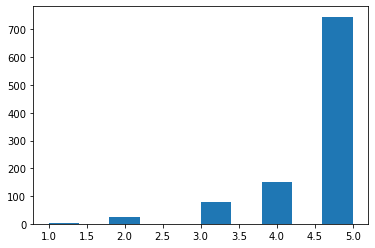

In [510]:
tmphist = plt.hist(s1.episode_lengths)

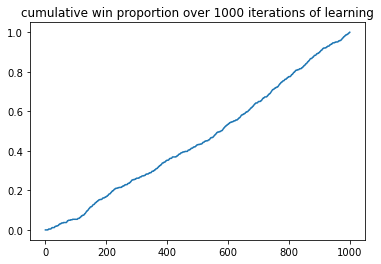

In [511]:
summed = []
i=0
for x in w1:
    i+=x
    summed.append(i/sum(w1))
plt.plot(summed) ## how often do wins happen?
plt.title('cumulative win proportion over 1000 iterations of learning')
plt.savefig('plots/CDF_grn_absent_yel_v1.svg')

In [512]:
#plt.plot(w1)

In [513]:
sum(w1)

428.0

In [ ]:
### number of correct /1000 using yellows: [374, 416, 438]

In [ ]:
### number of correct /1000 without yellows: [319,333,296]

(array([242., 131., 121.,  55.,  45.,  98., 151., 108.,  36.,  13.]),
 array([-15.,   0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135.]),
 <BarContainer object of 10 artists>)

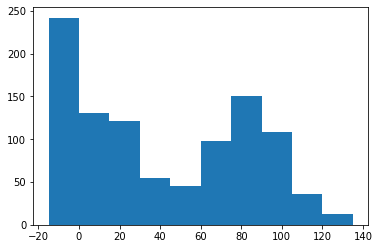

In [514]:
plt.hist(s1.episode_rewards)

In [515]:
q1

defaultdict(<function __main__.qLearning.<locals>.<lambda>()>,
            {0: array([ 4.26044207,  1.96030887, -1.5046197 ]),
             1: array([ 1.36986751, -0.46848968,  4.70484349]),
             3: array([-1.55443816, -0.43113726, 26.62537971]),
             2: array([-0.12554712, -1.95381473, 23.12608152]),
             4: array([-5.33214091, -0.45493825, 43.75526598]),
             5: array([0., 0., 0.])})

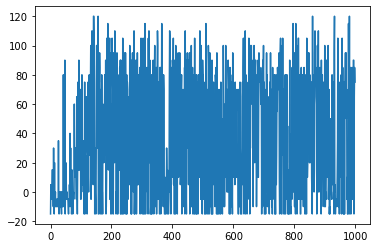

In [502]:
plt.plot(np.arange(len(s1.episode_lengths)), s1.episode_rewards)

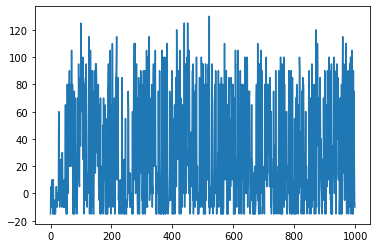

In [362]:
plt.plot(np.arange(len(s1.episode_lengths)), s1.episode_rewards)

In [363]:
w1.keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [288]:
w1['COUGH']

['WHICH',
 'THEIR',
 'THERE',
 'WOULD',
 'OTHER',
 'THESE',
 'ABOUT',
 'FIRST',
 'COULD',
 'AFTER',
 'THOSE',
 'WHERE',
 'BEING',
 'UNDER',
 'YEARS',
 'GREAT',
 'STATE',
 'WORLD',
 'THREE',
 'WHILE',
 'FOUND',
 'MIGHT',
 'STILL',
 'RIGHT',
 'PLACE',
 'EVERY',
 'POWER',
 'SINCE',
 'GIVEN',
 'NEVER',
 'ORDER',
 'WATER',
 'SMALL',
 'SHALL',
 'LARGE',
 'POINT',
 'AGAIN',
 'OFTEN',
 'AMONG',
 'HOUSE',
 'WOMEN',
 'GROUP',
 'THINK',
 'HUMAN',
 'LATER',
 'UNTIL',
 'WHOLE',
 'EARLY',
 'MEANS',
 'ABOVE',
 'VALUE',
 'STUDY',
 'TABLE',
 'TAKEN',
 'TIMES',
 'KNOWN',
 'COURT',
 'YOUNG',
 'WORDS',
 'WHITE',
 'LIGHT',
 'LEAST',
 'LEVEL',
 'CHILD',
 'DEATH',
 'PRESS',
 'CASES',
 'GOING',
 'PARTY',
 'USING',
 'SENSE',
 'BASED',
 'WHOSE',
 'SOUTH',
 'TOTAL',
 'CLASS',
 'LOCAL',
 'ALONG',
 'TERMS',
 'MONEY',
 'BLACK',
 'FORCE',
 'NORTH',
 'NIGHT',
 'SHORT',
 'FIELD',
 'ASKED',
 'QUITE',
 'THING',
 'WOMAN',
 'MAJOR',
 'THIRD',
 'SHOWN',
 'BEGAN',
 'CAUSE',
 'HEART',
 'SEEMS',
 'TRADE',
 'CLEAR',
 'MODEL',
